In [85]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.pipeline import make_pipeline

In [182]:

train_df = pd.read_csv("data/strat_train_set.csv")

In [183]:
train_df = train_df.drop('PID', axis = 1)

In [197]:
# Separate numerical features
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [44]:
# creating function to plot numeric features against sale price

def plot_numeric_features(train_df, numeric_features, ncols=3, height=5, width=15):
    nrows = int(np.ceil(len(numeric_features) / ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height * nrows))
    ax = ax.flatten()

    for i, col in enumerate(numeric_features):
        sns.scatterplot(data=train_df, x=col, y="SalePrice", color="blue", ax=ax[i])
        ax[i].set_xlabel(col)
        
    fig.tight_layout(pad=5.0)
    plt.show()



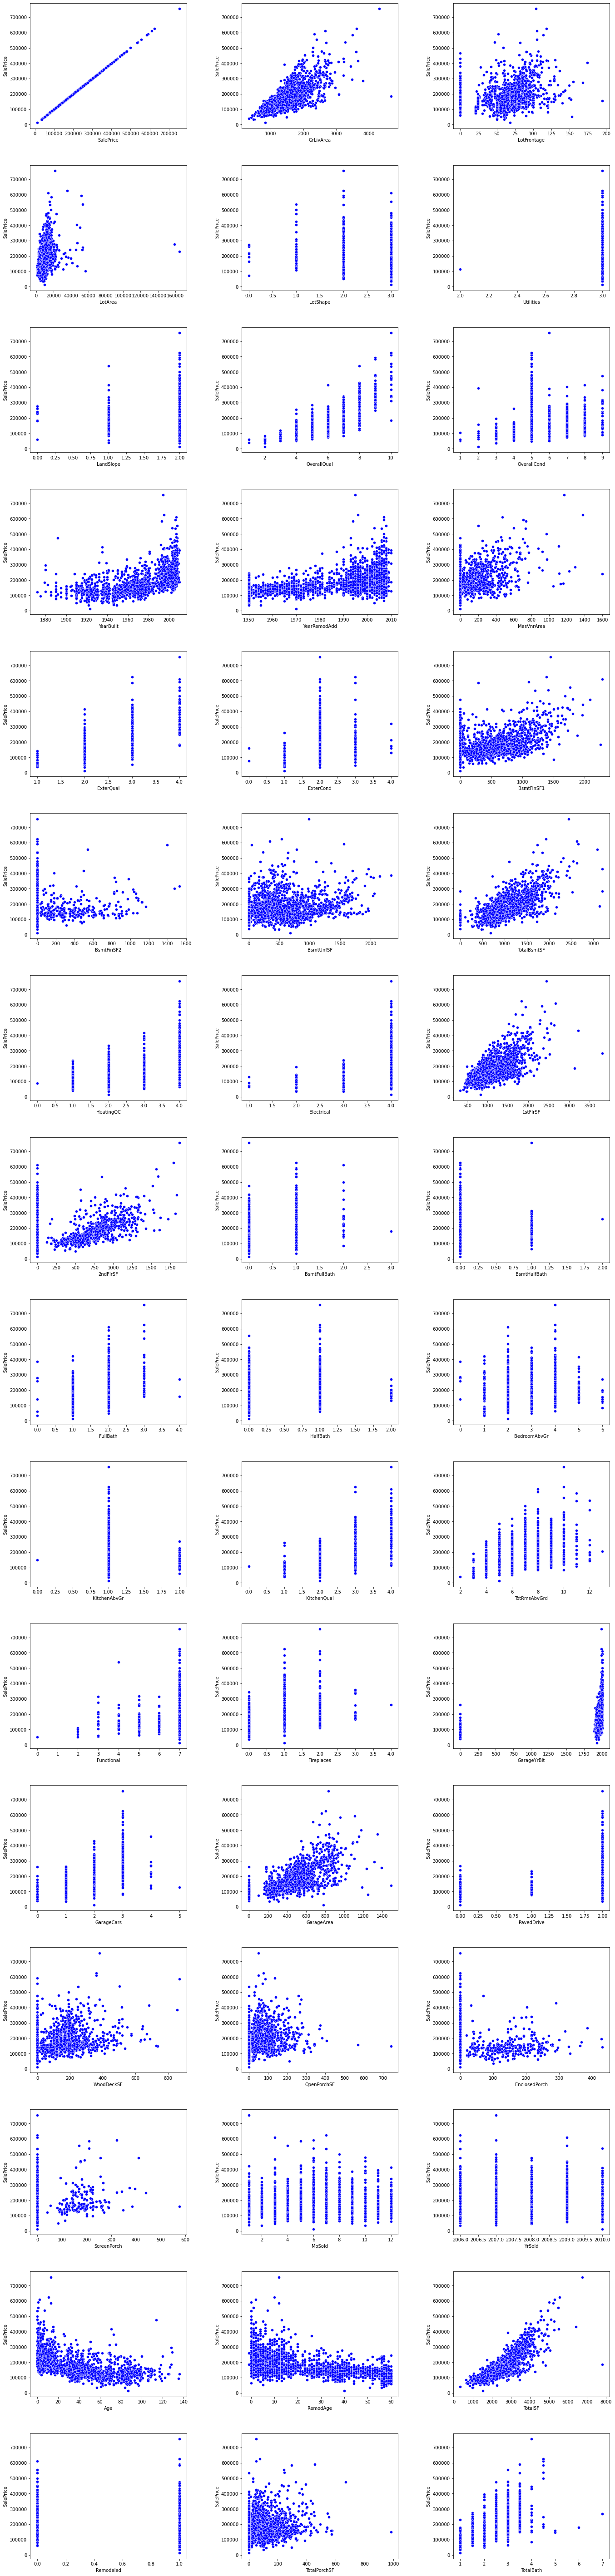

In [45]:
# plotting numeric features with function
plot_numeric_features(train_df, num_cols, width = 20)

In [46]:
# looking at the ditribution of the data.  Blue line is current ditribution and dotted red represents
# the normal distribution of the data

def plot_numeric_distribution(train_df, numeric_features, ncols=3, height=5, width=15):
    nrows = int(np.ceil(len(numeric_features) / ncols))
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height * nrows))
    ax = ax.flatten()

    for i, col in enumerate(numeric_features):
        sns.histplot(data=train_df, x=col, kde=True, color="blue", ax=ax[i], stat="density")
        ax[i].set_xlabel(col)
        
        # Overlay normal distribution curve
        mean, std = norm.fit(train_df[col])
        x = np.linspace(train_df[col].min(), train_df[col].max(), 100)
        y = norm.pdf(x, mean, std)
        ax[i].plot(x, y, 'r--', linewidth=2)
        
    fig.tight_layout(pad=5.0)
    plt.show()


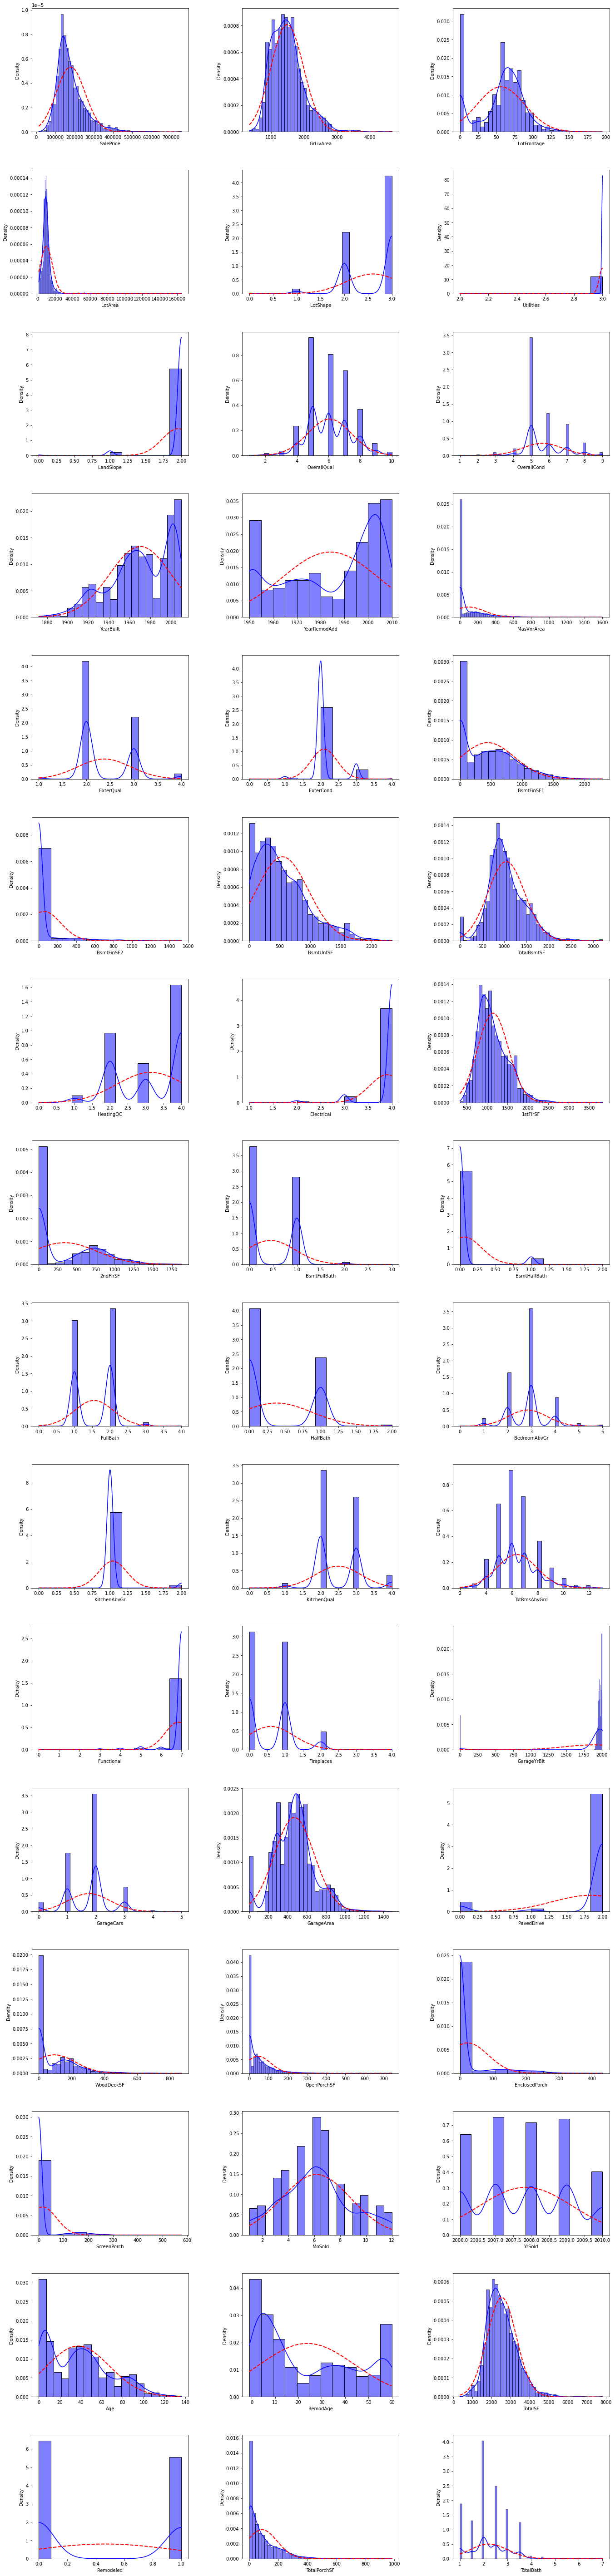

In [47]:
plot_numeric_distribution(train_df, num_cols, width = 20)

In [190]:
# Listing columns to transform with log
col_log = ['GrLivArea', 'LotArea', '1stFlrSF', 'GarageArea', 'TotalSF', 'TotalPorchSF' ]

In [191]:
# defining the remaining num columns

def_num_cols = [col for col in num_cols if col not in col_log]


In [192]:
# Define pipeline for numerical features

default_num_pipeline = make_pipeline(StandardScaler(with_mean=False))

# Define pipeline for log features
log_pipeline = make_pipeline(
    FunctionTransformer(np.log1p, validate=True),
    StandardScaler()
)

# Define pipeline for categorical features
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse=False),
    StandardScaler()
)

# Apply the preprocessing pipelines to the appropriate features
preprocessing = ColumnTransformer([
    ('num', default_num_pipeline, def_num_cols),
    ("log", log_pipeline, col_log),
    ('cat', cat_pipeline, cat_cols)
])


In [193]:
# THIS NEEDS TO BE DONE AFTER NEW GROUPS ARE CREATED BASED ON NEIGHBORHOOD_ST
train_df = train_df.drop(['Neighborhood_st', 'Street'], axis=1)

In [194]:
# Defining categorical columns
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

In [195]:
train_prepared = preprocessing.fit_transform(train_df)
train_prepared.shape

(2046, 266)